# Data Exploration

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

In [290]:
import numpy as np
import pandas as pd

In [280]:
import seaborn as sns

In [22]:
contacts_file = ("/Users/puchku-home/Study/Python Libs/Projects/datasets/contacts.tsv")
contacts = pd.read_csv(contacts_file, sep="\t")

searches_file = ("/Users/puchku-home/Study/Python Libs/Projects/datasets/searches.tsv")
searches = pd.read_csv(searches_file, sep="\t")

# Searches Dataset

In [24]:
searches = searches.drop(columns=['filter_neighborhoods'])

In [26]:
searches['ds'] = pd.to_datetime(searches['ds'])
searches['ds_checkin'] = pd.to_datetime(searches['ds_checkin'])
searches['ds_checkout'] = pd.to_datetime(searches['ds_checkout'])

In [28]:
searches['length_preperation'] = searches['ds_checkin'] - searches['ds']

# Distribution

## Distribution plot of n_guests_min and n_guests_max

Text(0, 0.5, 'Count')

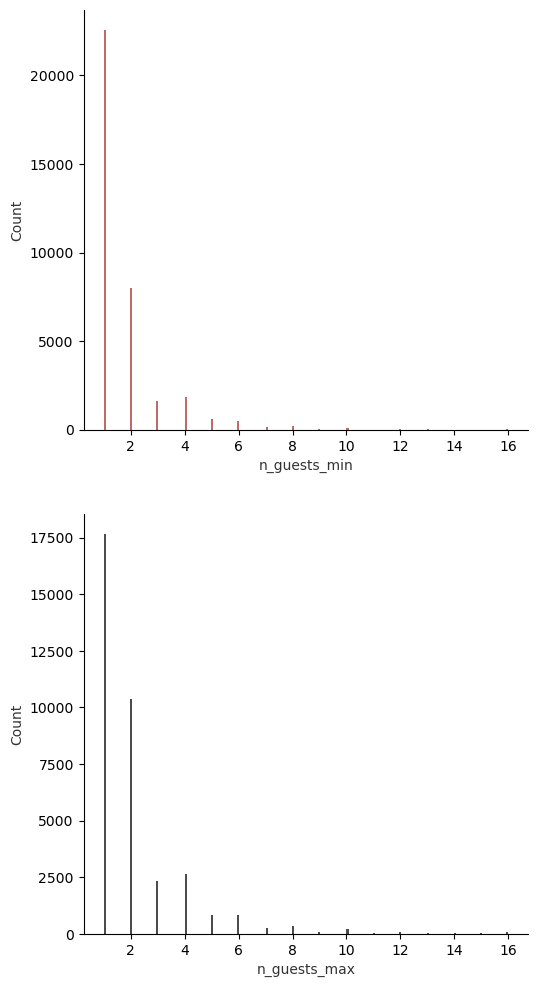

In [113]:
fig = plt.figure(figsize = (12,12))
gs = gridspec.GridSpec(nrows = 2, ncols = 4)
ax = fig.add_subplot(gs[:1,:2])
ax1 = fig.add_subplot(gs[1:,:2])

ax.spines[['top','right']].set_visible(False)
ax1.spines[['top','right']].set_visible(False)

ax.hist(x = searches['n_guests_min'], color = 'brown', bins = 200, alpha = 0.7)
ax1.hist(x = searches['n_guests_max'],color = 'black', bins = 200, alpha = 0.7)

ax.set_xlabel('n_guests_min', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)

ax1.set_xlabel('n_guests_max', alpha = 0.8)
ax1.set_ylabel('Count', alpha = 0.8)

## When were searches conducted

Text(0, 0.5, 'Count')

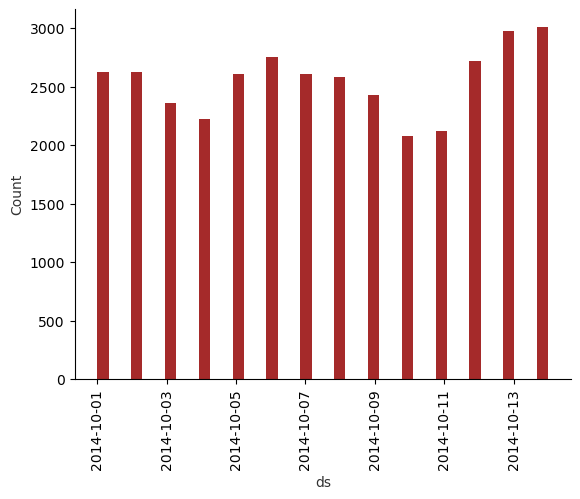

In [148]:
fig ,ax = plt.subplots()
ax.hist(x = searches['ds'], color = 'brown', bins = 40)
plt.xticks(rotation = 90)
ax.spines[['top','right']].set_visible(False)

ax.set_xlabel('ds', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)

## Distribution of filter_price_max of searches

In [150]:
searches_maxprice_removed = searches[searches['filter_price_max'] <= 600]

Text(0, 0.5, 'Count')

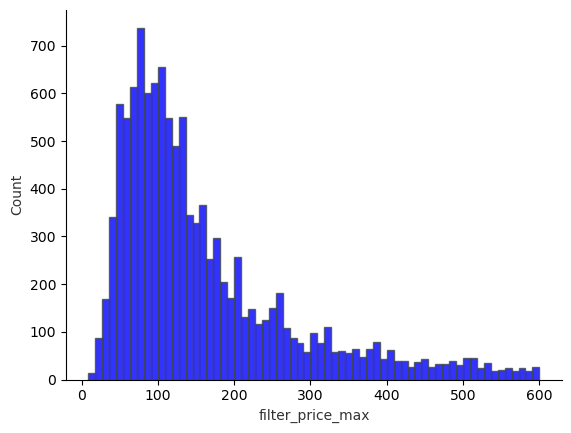

In [199]:
fig ,ax = plt.subplots()
ax.hist(x = searches_maxprice_removed["filter_price_max"], color = 'blue', bins = 65, edgecolor = '#414a4c', alpha = 0.8)
ax.spines[['top','right']].set_visible(False)

ax.set_xlabel('filter_price_max', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)

## Distribution of length_preperation of searches

In [202]:
#Percentage of dataset beyond 100 days
distribution = searches["length_preperation"] / np.timedelta64(1, 'D')
print(len(distribution[distribution > 100])/len(distribution)*100, '% \n')

#Remove values beyond 100 days
distribution = distribution[distribution < 100]

9.396423874415872 % 



Text(0, 0.5, 'Count')

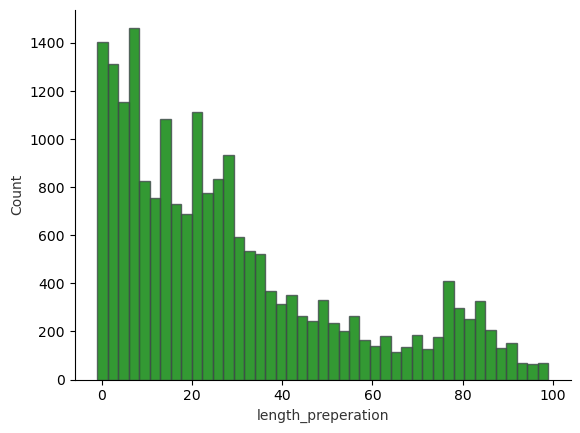

In [216]:
fig ,ax = plt.subplots()
ax.hist(x = distribution, color = 'green', bins = 43, edgecolor = '#414a4c', alpha = 0.8)
ax.spines[['top','right']].set_visible(False)

ax.set_xlabel('length_preperation', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)

## Distribution of n_nights of searches

In [223]:
#Percentage of dataset beyond 20 nights
print(len(searches[searches['n_nights'] > 20])/len(searches['n_nights'])*100, '% \n')

#Remove n_nights beyond 20 days
searches_within_twenty = searches[searches['n_nights'] < 20]

4.737387021854101 % 



Text(0, 0.5, 'Count')

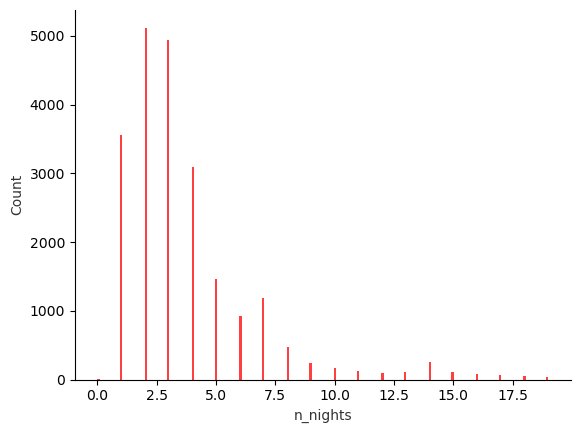

In [233]:
fig ,ax = plt.subplots()
ax.hist(x = searches_within_twenty['n_nights'], color = 'red', bins = 200, alpha = 0.75)
ax.spines[['top','right']].set_visible(False)

ax.set_xlabel('n_nights', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)

## Distribution of months of ds_checkin of searches

In [236]:
checkin_month = pd.DatetimeIndex(searches['ds_checkin']).month

Text(0, 0.5, 'Count')

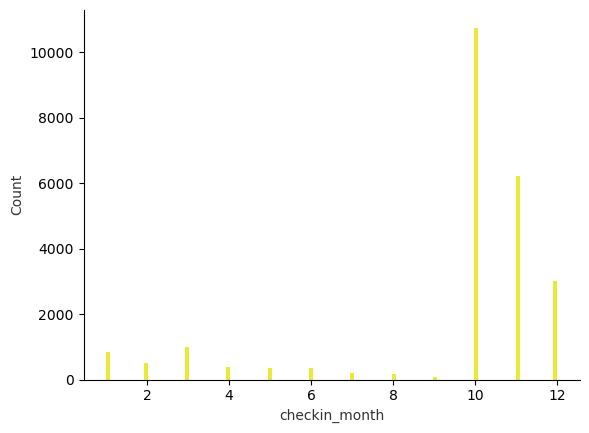

In [248]:
fig ,ax = plt.subplots()
ax.hist(x = checkin_month, color = '#e9e93a', bins = 120)
ax.spines[['top','right']].set_visible(False)

ax.set_xlabel('checkin_month', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)

## Find top 15 countries where searches originate from

In [252]:
#Group by origin country and finding the count of each country
search_origin = searches.groupby("origin_country").agg({'origin_country' : 'count'})
search_origin.columns = ['count']

search_origin = search_origin.sort_values('count', ascending = False) #Sort count in descending order
search_origin.nlargest(15, 'count') #Find the 15 largest values

,count
origin_country,
IE,6608
US,5811
GB,4832
FR,3444
IT,2333
DE,2170
ES,1759
CA,1085
AU,962


# Contacts Dataset

In [255]:
#Manipulation of contacts dataset

#Convert date columns to datetime data type 
contacts['ts_contact_at'] = pd.to_datetime(contacts['ts_contact_at'])
contacts['ts_reply_at'] = pd.to_datetime(contacts['ts_reply_at'])
contacts['ts_accepted_at'] = pd.to_datetime(contacts['ts_accepted_at'])
contacts['ts_booking_at'] = pd.to_datetime(contacts['ts_booking_at'])
contacts['ds_checkin'] = pd.to_datetime(contacts['ds_checkin'])
contacts['ds_checkout'] = pd.to_datetime(contacts['ds_checkout'])
contacts['accepted'] = np.where(np.isnan(contacts['ts_accepted_at']), False, True)

contacts['length_stay'] = contacts['ds_checkout'] - contacts['ds_checkin']

#Understand dataset
display(contacts.dtypes)
display(contacts.describe())

id_guest                   object
id_host                    object
id_listing                 object
ts_contact_at      datetime64[ns]
ts_reply_at        datetime64[ns]
ts_accepted_at     datetime64[ns]
ts_booking_at      datetime64[ns]
ds_checkin         datetime64[ns]
ds_checkout        datetime64[ns]
n_guests                    int64
n_messages                  int64
accepted                     bool
length_stay       timedelta64[ns]
dtype: object

,ts_contact_at,ts_reply_at,ts_accepted_at,ts_booking_at,ds_checkin,ds_checkout,n_guests,n_messages,length_stay
count,7823,7219,3627,2174,7823,7823,7823.000000,7823.000000,7823
mean,2014-10-10 11:59:33.640802816,2014-10-10 22:42:36.511982336,2014-10-11 14:07:07.993382912,2014-10-13 07:54:43.307267840,2014-11-16 09:47:00.452511744,2014-11-22 05:12:33.317141760,2.422600,6.319954,5 days 19:25:32.864629937
min,2014-03-04 11:08:13,2014-04-18 09:39:06,2014-05-21 16:51:54,2014-05-21 16:51:54,2014-10-01 00:00:00,2014-10-02 00:00:00,1.000000,1.000000,1 days 00:00:00
25%,2014-10-03 16:28:52,2014-10-03 23:07:32,2014-10-04 13:45:13,2014-10-05 13:53:46,2014-10-15 00:00:00,2014-10-19 00:00:00,1.000000,2.000000,2 days 00:00:00
50%,2014-10-08 17:34:36,2014-10-09 00:16:21,2014-10-09 13:46:50,2014-10-10 11:15:13,2014-10-31 00:00:00,2014-11-06 00:00:00,2.000000,4.000000,3 days 00:00:00
75%,2014-10-13 21:28:51.500000,2014-10-14 10:00:04.500000,2014-10-14 16:28:27.500000,2014-10-15 13:16:17.249999872,2014-11-22 00:00:00,2014-11-30 00:00:00,3.000000,8.000000,5 days 00:00:00
max,2015-02-02 08:45:18,2015-02-02 23:18:25,2015-02-03 14:16:42,2015-01-21 16:16:29,2015-10-24 00:00:00,2015-12-01 00:00:00,16.000000,102.000000,334 days 00:00:00
std,NaN,NaN,NaN,NaN,NaN,NaN,1.617347,6.472827,14 days 23:45:24.447710564


In [257]:
display(contacts.skew(axis = 0, numeric_only = True, skipna = True))

n_guests      2.441468
n_messages    3.696440
accepted      0.145883
dtype: float64

## Number of guests stayed

In [260]:
contacts_less8 = contacts[contacts['n_guests'] < 8]

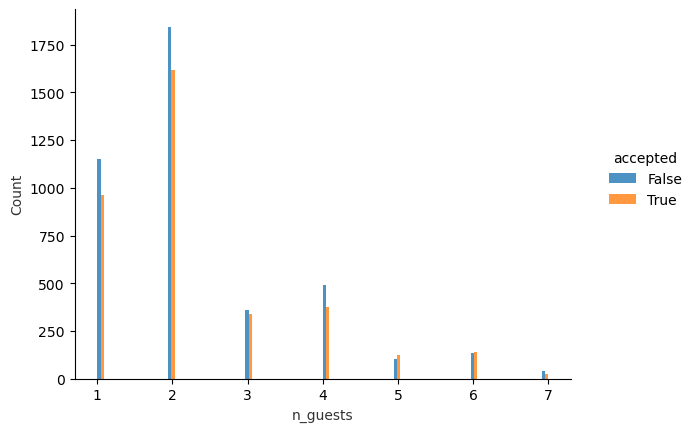

In [390]:
fig ,ax = plt.subplots()
ax.hist(
    [contacts_less8.query('accepted == False')['n_guests'],
    contacts_less8.query('accepted == True')['n_guests']],
    bins=70,
    color=['#ff7f0d', '#1f77b4'][::-1],
    label=['True', 'False'][::-1],
    histtype='bar',
    rwidth = 1,
    alpha = 0.8
)

ax.set_xlabel('n_guests', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)
ax.legend(title = 'accepted', bbox_to_anchor = (1.25,0.65),frameon = False)
ax.spines[['top','right']].set_visible(False)

In [371]:
#Conversion rate from accepting to booking

contacts['ts_booking_at'].count()/contacts['ts_accepted_at'].count()

0.5993934381031155

## Timeframe of when guests or accepted vs rejected

In [376]:
contacts['month_checkin'] = contacts['ds_checkin'].dt.month #Extract month from checkin date
contacts_checkin = contacts[contacts['month_checkin'] > 9] #Use only peak season months (Oct, Nov, Dec)

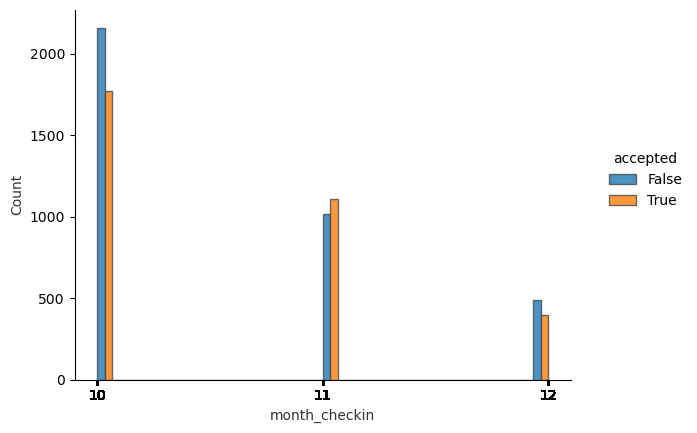

In [424]:
fig ,ax = plt.subplots()
ax.hist(
    [contacts_checkin.query('accepted == False')['month_checkin'],
    contacts_checkin.query('accepted == True')['month_checkin']],
    bins=30,
    color=['#ff7f0d', '#1f77b4'][::-1],
    label=['True', 'False'][::-1],
    histtype='bar',
    rwidth = 1,
    alpha = 0.8,
    edgecolor = '#414a4c'
)

ax.set_xticks(contacts_checkin['month_checkin'][::3])

ax.set_xlabel('month_checkin', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)
ax.legend(title = 'accepted', bbox_to_anchor = (1.25,0.65),frameon = False)
ax.spines[['top','right']].set_visible(False)

In [426]:
merged_datasets = contacts.merge(searches, left_on='id_guest', right_on='id_user')

## Check difference between prices searched between accepted/rejected applicants

In [429]:
merged_pricemax_filter = merged_datasets.loc[(merged_datasets['filter_price_max'] <= 600)]

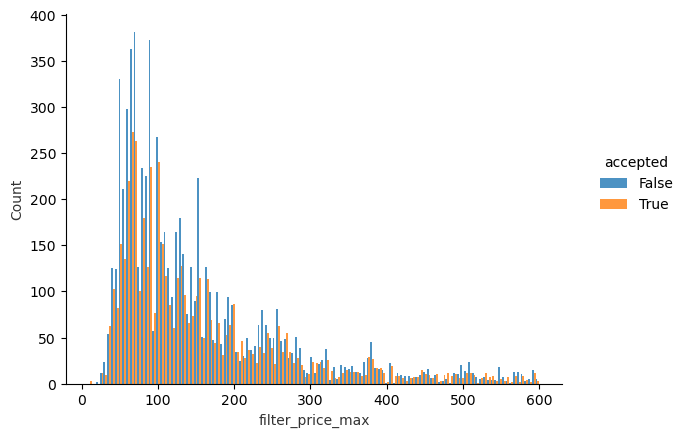

In [443]:
fig ,ax = plt.subplots()
ax.hist(
    [merged_pricemax_filter.query('accepted == False')['filter_price_max'],
    merged_pricemax_filter.query('accepted == True')['filter_price_max']],
    bins=120,
    color=['#ff7f0d', '#1f77b4'][::-1],
    label=['True', 'False'][::-1],
    histtype='bar',
    rwidth = 1,
    alpha = 0.8,
    #edgecolor = '#414a4c'
)

ax.set_xlabel('filter_price_max', alpha = 0.8)
ax.set_ylabel('Count', alpha = 0.8)
ax.legend(title = 'accepted', bbox_to_anchor = (1.25,0.65),frameon = False)
ax.spines[['top','right']].set_visible(False)

In [445]:
#Classify dataset based on filter_price_max

def label_price (row):
    if (row['filter_price_max'] >= 0) & (row['filter_price_max'] < 100):
        return '0-100'
    
    elif (row['filter_price_max'] >= 100) & (row['filter_price_max'] < 200):
        return '100-200'

    elif (row['filter_price_max'] >= 200) & (row['filter_price_max'] < 300):
        return '200-300'
    
    elif (row['filter_price_max'] >= 300) & (row['filter_price_max'] < 400):
        return '300-400'

    elif (row['filter_price_max'] >= 400) & (row['filter_price_max'] < 500):
        return '400-500'
    
    elif (row['filter_price_max'] >= 500) & (row['filter_price_max'] < 600):
        return '500-600'
    
    else:
        return '600+'

merged_datasets['classification_max_price'] = merged_datasets.apply(lambda row: label_price(row), axis=1)

merged_datasets.groupby('classification_max_price').agg({'accepted': 'mean'})

,accepted
classification_max_price,
0-100,0.411160
100-200,0.430308
200-300,0.431149
300-400,0.450488
400-500,0.485549
500-600,0.422297
600+,0.433122


In [447]:
#Find the acceptance rate by country

dataset_country = merged_datasets[['origin_country', 'accepted']]

#Find acceptance count by country and accepted
accepted_count = dataset_country.groupby(['origin_country', 'accepted']).agg({'origin_country':'count'})
accepted_count.columns = ['count_accepted']

#Find acceptance count by country
country_count = dataset_country.groupby(['origin_country']).agg({'origin_country':'count'})
country_count.columns = ['count_country']

#Merge datasets for easier manipulation 
acceptance_country = pd.merge(dataset_country, accepted_count,  how='left', on=['origin_country','accepted']) #Merge accepted count
acceptance_country = acceptance_country.drop_duplicates()

acceptance_country = pd.merge(acceptance_country, country_count, how='left', on=['origin_country']) #Merge total country count
acceptance_country = acceptance_country.sort_values(['count_country', 'accepted'], ascending = [False, True])
acceptance_country = acceptance_country[acceptance_country['count_country'] >= 100] #100 is used so there is a good amount of data to make assumptions
acceptance_country = acceptance_country[acceptance_country['accepted'] == True]

#Divide count_accepted column by count_country column to find acceptance rate by country
acceptance_country['acceptance_rate'] = acceptance_country['count_accepted']/acceptance_country['count_country']
acceptance_country.sort_values(['acceptance_rate'], ascending = True)

,origin_country,accepted,count_accepted,count_country,acceptance_rate
73,IN,True,138,874,0.157895
55,HR,True,159,530,0.300000
72,AT,True,83,239,0.347280
54,RU,True,83,239,0.347280
11,IT,True,1183,3137,0.377112
100,AE,True,59,154,0.383117
0,CA,True,407,993,0.409869
13,IE,True,1217,2951,0.412403
24,ES,True,794,1914,0.414838
49,RO,True,50,118,0.423729
